# Statistics with Python:
Summarized from Python files with ThinkStats

In [36]:
# derived from code from ThinkStats2
import random
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [24]:
# Data set option 1: Hard coded dictionary

DATA_SOURCE = 'Hardcoded Age v Cholestorol'
toydata = {'Age':[25,25,28,32,32,32,38,42,48,51,51,58,62,65], 
           'Cholestorol':[180,195,186,180,210,197,239,183,204,
                          221,243,208,228,269]}

feature1 = 'Age'
feature2 = 'Cholestorol'

In [37]:
# Data set option 2: Import .csv file
#     - USA_Housing.csv : feature1 = 'Price', 'Area_Population', 'Area_Income',
#     - patients.csv: features = 'Height', 'Age', 'Weight'

DIRECTORY = 'toy_data/'
DATA_SOURCE = 'USA_Housing.csv' 
feature1 = 'Price'       # independent variable
feature2 = 'Area_Income' # dependent variable

def csv_data(directory, file_name):
    '''csv file to DataFrame. Default == FILE_NAME'''
    data = pd.read_csv(DIRECTORY + DATA_SOURCE)
    df = pd.DataFrame(data)
    return df

toydata = csv_data(DIRECTORY, DATA_SOURCE)

# Characterizing one variable (feature, column)

In [38]:
def Mean(data):
    return float(sum(data))/len(data)

def Stdev(data):
    return math.sqrt(Variance(data))

def Median(data):
    return np.median(data)

def MeanVar(data):
    mu = Mean(data)
    var = Var(data, mu)
    return mu, var

def IQR(data):
    Q1 = np.percentile(data, 25, interpolation = 'midpoint') 
    med = Median(data)
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    max_range = max(data)
    min_range = min(data)
    return min_range, Q1, med, Q3, max_range
    
def Var(data, mu=None):
    if mu is None:
        mu = Mean(data)
    dev2 = [(x - mu)**2 for x in data] #squared deviation return mean
    var = Mean(dev2)
    return var

def TrimmedMeanVar(data, p=0.01):
    t = Trim(data, p)
    mu, var = MeanVar(t)
    return mu, var

def TrimmedMean(data, p=0.01):
    t = Trim(data, p)
    return Mean(t)

def Trim(t, p=0.01): 
    n = int(p * len(t))
    if n != 0:
        t = sorted(t)[n:-n]
    return t

In [39]:
ft = feature1
t = toydata[ft]
m = Mean(t)
v = Var(t)
std = Stdev(t)
mv = MeanVariance(t)
tm_p10, tv_p10 = TrimmedMeanVar(t,p=0.1)
tmin, Q1, med, Q3, tmax = IQR(t)

In [40]:
report = 'Report on data from: {} <{}>, {} records.\n{}\nMean: {:12}\nVariance:{:12}\nStDev:{:12}'
iqr = '{}\nIQR:\n\nMinimum: {:12}\n1st Quartile: {:9}\nMedian: {:15}\n3rd Quartile: {:9}\nMaximum: {:12}'
print(report.format(DATA_SOURCE, ft, len(t), '-'*50, m, v, std))
print(iqr.format('-'*50, tmin, Q1, med, Q3, tmax))

Report on data from: USA_Housing.csv <Price>, 5000 records.
--------------------------------------------------
Mean: 1232072.65414236
Variance:124667119790.60095
StDev:353082.31305263785
--------------------------------------------------
IQR:

Minimum: 15938.657923287901
1st Quartile: 997535.5903280955
Median: 1232669.37796579
3rd Quartile: 1471388.98784729
Maximum: 2469065.5941747003


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

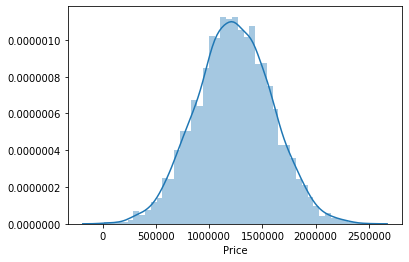

In [42]:
sns.distplot(t,axlabel=ft)

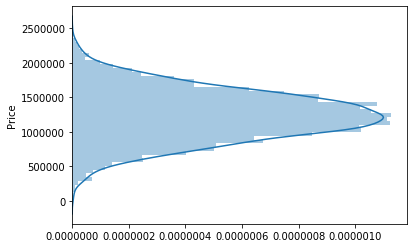

In [43]:
sns.distplot(t,axlabel=ft, vertical=True)

# Characterizing two variables (features, columns)

In [44]:
ft1 = toydata[feature1]
ft2 = toydata[feature2]

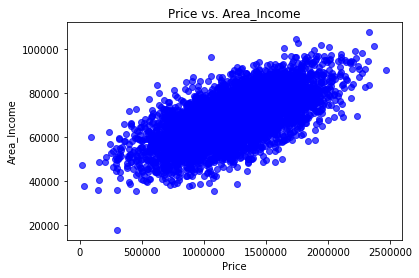

In [45]:
plt.scatter(ft1,ft2, marker='o', color='b', alpha=0.7)
plt.title(feature1 + ' vs. ' + feature2)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

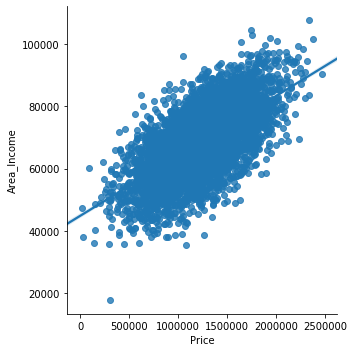

In [46]:
sns.lmplot(x=feature1,y=feature2,data=toydata)

In [47]:
#Least squares
from statsmodels.formula.api import ols

comparison = '{} ~ {}'.format(feature1, feature2)
model = ols(comparison, data=toydata).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     3463.
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:19:18   Log-Likelihood:                -69651.
No. Observations:                5000   AIC:                         1.393e+05
Df Residuals:                    4998   BIC:                         1.393e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.216e+05    2.5e+04     -8.863      

In [35]:
import math
math.sqrt(0.515)

0.7176350047203662